### Hyperparameters

In [13]:
max_features = 5000
maxlen = 100
batch_size = 32
embedding_dims = 50
nb_filter = 10
filter_length = 1
nb_epoch = 10

### Load Data

In [14]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(index_from=0, nb_words=max_features)
word2idx = imdb.get_word_index()
idx2word = {idx: word for word, idx in word2idx.items()}

X_train.shape, X_test.shape

((25000,), (25000,))

### Example

In [15]:
review_no = np.random.randint(X_train.shape[0])

' '.join(idx2word[idx] for idx in X_train[review_no] if idx > 1)

"you gotta wonder how some and ever get made this one decided to skip with why among many other things and just and off beyond and br br and yet you have a number of decent actors doing their best to and some life into story blue and throughout movie and into and and which on its own would be depressing but here it's and idea that it's not a medical condition not some house or and or and curse but just something that for no apparent reason starts to happen to our protagonist and then to everyone else around her just winds up being much like taking a big and out of an empty and some and have super powers but others don't or don't know they do it seems they're just as and as we are br br it's a poor man's rip off of invasion of body and with and and mirror and and sense were you to seriously and those three together"

### Sequence Lengths

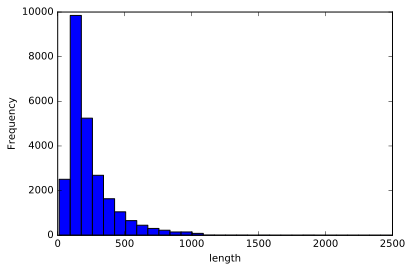

In [16]:
pd.Series(len(X) for X in X_train).plot(kind='hist', bins=30)

plt.xlabel('length')

### Pad Sequences to Same Length

In [17]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

X_train.shape, X_test.shape

((25000, 100), (25000, 100))

### Only Take First 1000 Examples

In [18]:
X_train, X_test = X_train[:1000], X_test[:1000]
y_train, y_test = y_train[:1000], y_test[:1000]

### Visualize Left Padding

array([1412,   30,    3,   19,    9,  212,   25,   74,   49,    2,   11,
        404,   13,   79,    2,    5,    1,  104,  114,    2,   12,  253,
          1,    2,    4, 3763,    2,  720,   33,   68,   40,  527,  473,
         23,  397,  314,   43,    4,    1,    2, 1026,   10,  101,   85,
          1,  378,   12,  294,   95,   29, 2068,   53,   23,  138,    3,
        191,    2,   15,    1,  223,   19,   18,  131,  473,   23,  477,
          2,  141,   27,    2,   15,   48,   33,   25,  221,   89,   22,
        101,    1,  223,   62,   13,   35, 1331,   85,    9,   13,  280,
          2,   13, 4469,  110,  100,   29,   12,   13,    2,   16,  175,
         29], dtype=int32)

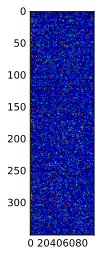

In [19]:
plt.imshow(X_train[:350])

X_train[0]

### Define Model

In [20]:
from keras.layers import Input, Dense, Embedding, LSTM
from keras.models import Model

input = Input(shape=[maxlen], dtype='int32')

embedded = Embedding(input_dim=max_features, output_dim=embedding_dims, input_length=maxlen, mask_zero=True, name='embedding')(input)
lstmed = LSTM(output_dim=16, return_sequences=True)(embedded)

# We project onto a single unit output layer, and squash it with a sigmoid:
prob = Dense(output_dim=1, activation='sigmoid')(lstmed)

model = Model(input=input, output=prob)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 100)           0                                            
____________________________________________________________________________________________________
embedding (Embedding)            (None, 100, 50)       250000      input_4[0][0]                    
____________________________________________________________________________________________________
lstm_3 (LSTM)                    (None, 16)            4288        embedding[0][0]                  
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             17          lstm_3[0][0]                     
Total params: 254305
______________________________________________________________________

In [21]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

InvocationException: Program terminated with status: -5. stderr follows: dyld: Library not loaded: /usr/lib/libltdl.7.dylib
  Referenced from: /Users/ebanner/.anaconda/envs/py27/bin/dot
  Reason: image not found


### Fit Model

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_data=(X_test, y_test))

### Get Filters

In [14]:
embeddings = model.get_layer('embedding').W.eval()

embeddings.shape

(5000, 50)

In [19]:
filters = model.get_layer('conv').W.eval()

filter_no = np.random.randint(filters.shape[0])
filter = filters[filter_no].flatten()

scores = np.dot(embeddings, filter[:, np.newaxis]).flatten()

top_idxs = list(reversed(np.argsort(scores))) # add one because that's where indexing starts

[idx2word[idx] for idx in top_idxs[:10]]

['poignant',
 'gem',
 'favorite',
 'generation',
 'living',
 'seasons',
 'brazil',
 'excellent',
 'gentle',
 'segment']